In [84]:
# Firstly, we set up all of our imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
# Then we load in all of our data

test = pd.read_csv("/home/azusa/machinelearningass1/datasets/test.csv") # I still haven't figured out relative paths in Jupyter yet haha
train = pd.read_csv("/home/azusa/machinelearningass1/datasets/train.csv")
meta = pd.read_csv("/home/azusa/machinelearningass1/datasets/metadata.csv")
sample = pd.read_csv("/home/azusa/machinelearningass1/datasets/sample_solution.csv")

In [86]:
# Then we can inspect what all of the fields in our data mean
meta.head(100)

,id,id of the row
0,TARGET_poverty,Target field: % of population living in poverty
1,total_population,Total count of population of the region
2,total_men,Total count of Men in the region
3,total_women,Total count of Women in the region
4,percent_hispanic,% of population of Hispanic descent
5,percent_white,% of population of European descent
6,percent_black,% of population of Afrian American descent
7,percent_native,% of population of Native American descent
8,percent_asian,% of population of Asian descent
9,percent_pacific,% of population of Pacific Islander descent


In [149]:
# Then get an idea of the dimensions and some of the data
print(train.shape)
train.sample(10)
#test.sample(10)
sample.head(20)
#test.shape

(3218, 29)


,id,TARGET_poverty
0,1,12.5
1,2,37.5
2,3,11.0
3,4,43.1
4,5,16.6
5,6,18.8
6,7,16.7
7,8,13.0
8,9,11.8
9,10,10.4


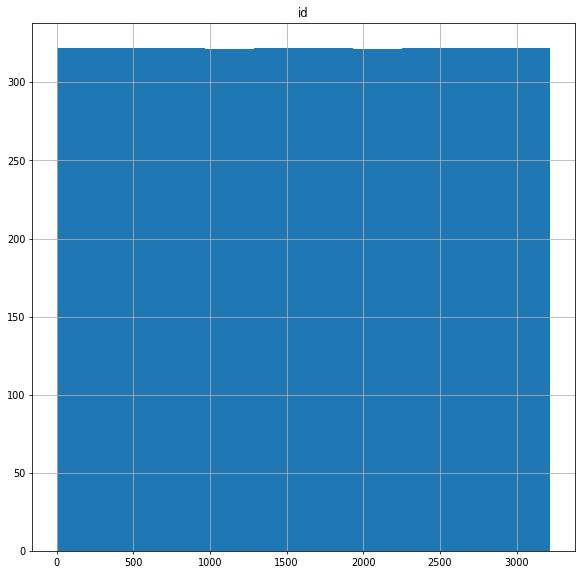

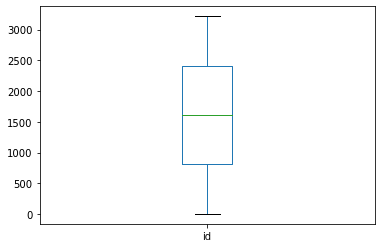

Data is of type: multiclass


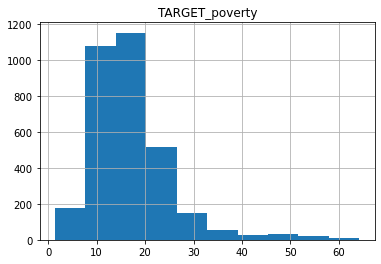

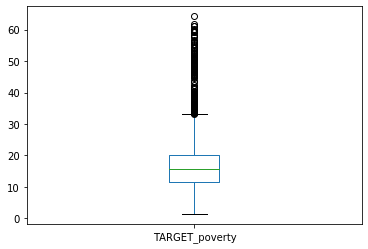

Data is of type: continuous


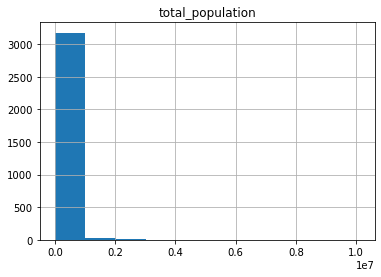

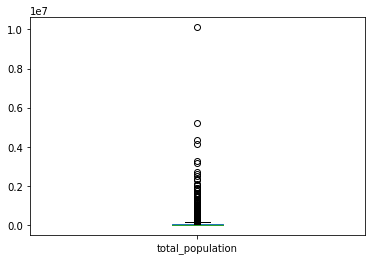

Data is of type: multiclass


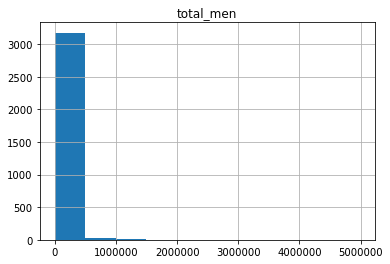

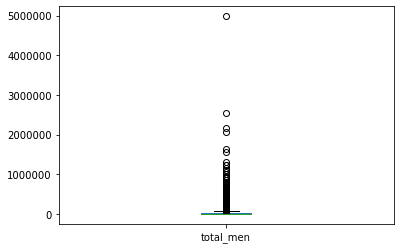

Data is of type: multiclass


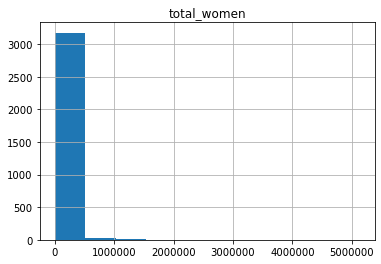

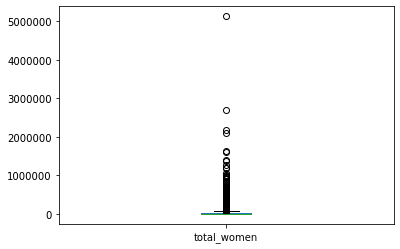

Data is of type: multiclass


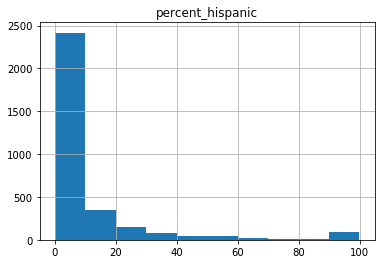

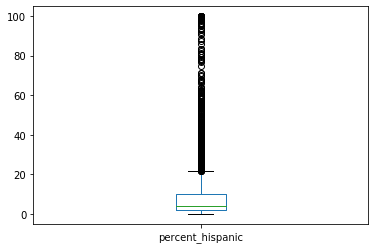

Data is of type: continuous


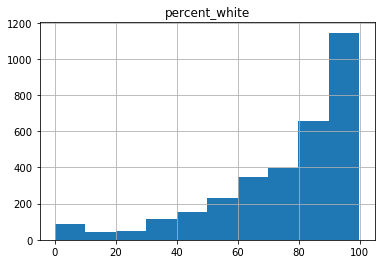

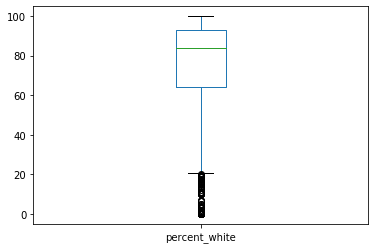

Data is of type: continuous


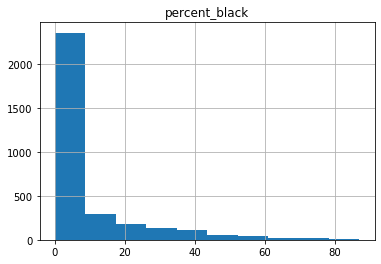

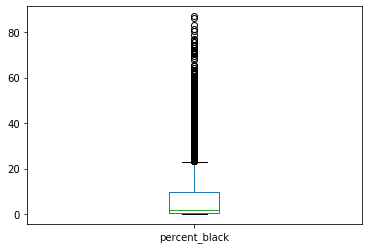

Data is of type: continuous


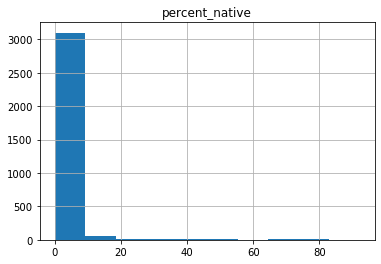

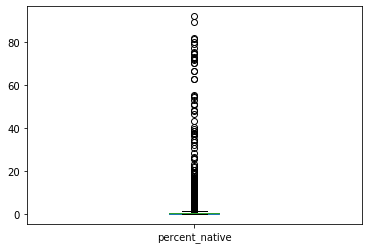

Data is of type: continuous


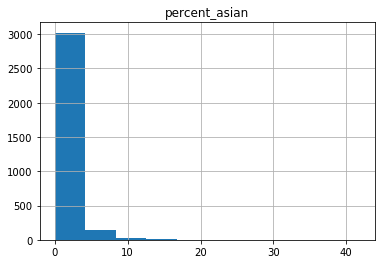

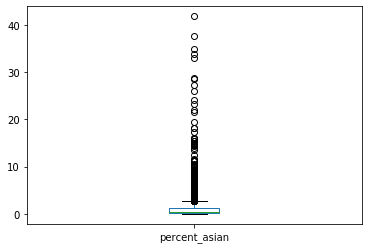

Data is of type: continuous


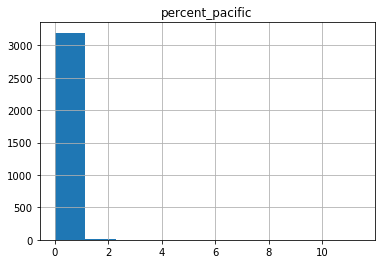

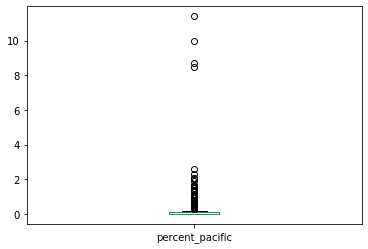

Data is of type: continuous


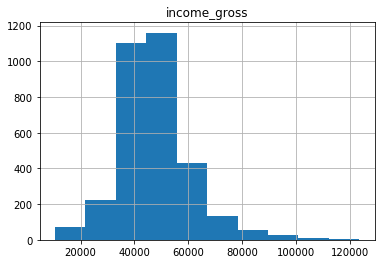

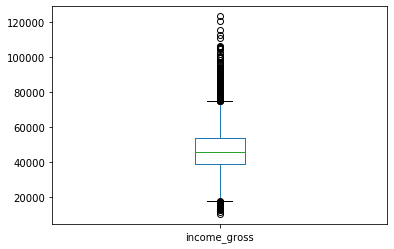

Data is of type: multiclass


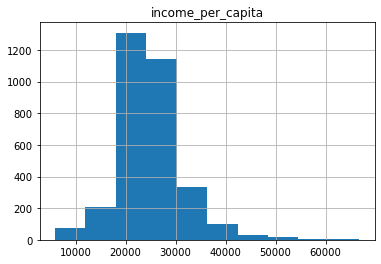

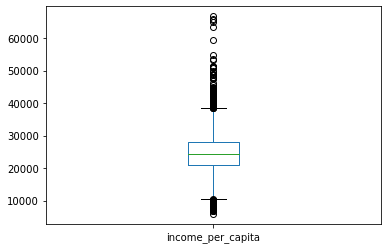

Data is of type: multiclass


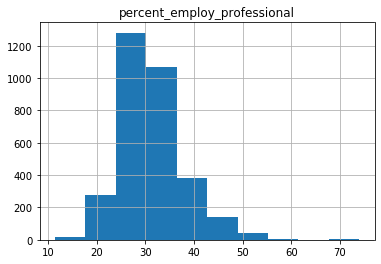

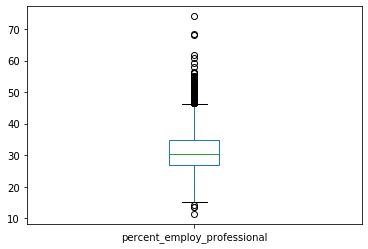

Data is of type: continuous


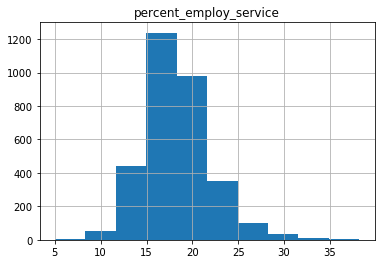

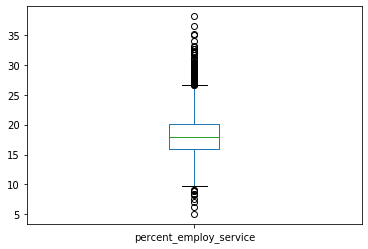

Data is of type: continuous


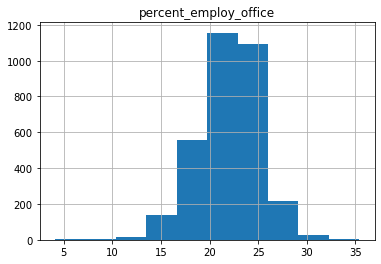

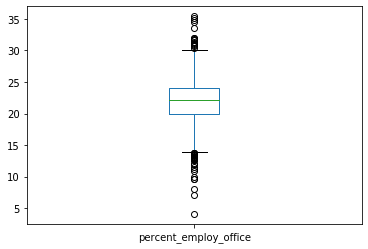

Data is of type: continuous


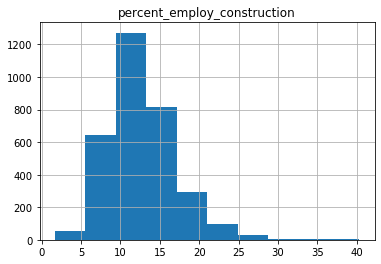

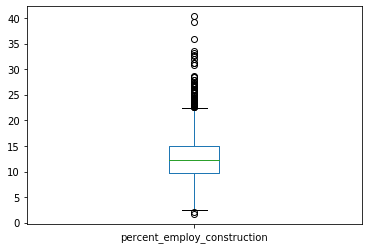

Data is of type: continuous


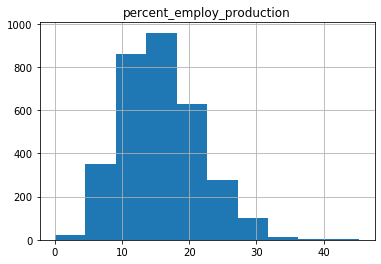

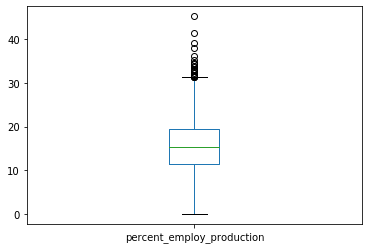

Data is of type: continuous


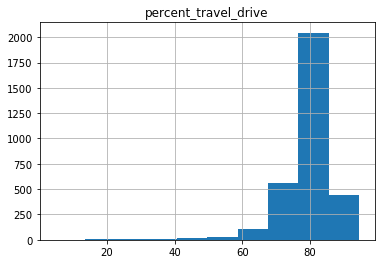

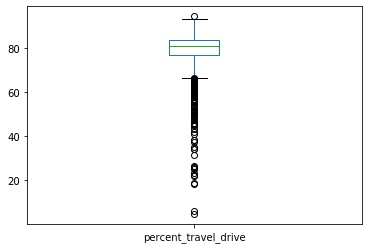

Data is of type: continuous


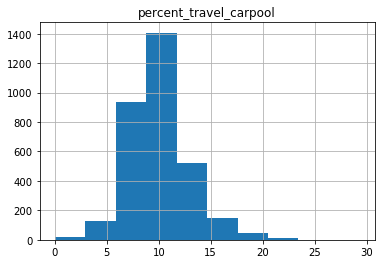

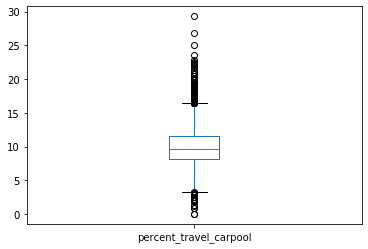

Data is of type: continuous


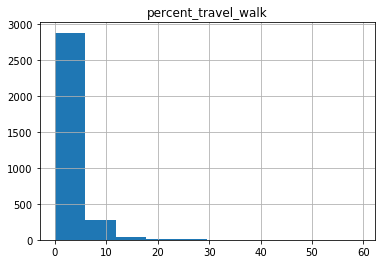

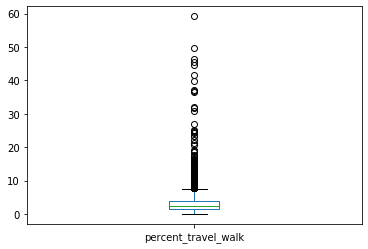

Data is of type: continuous


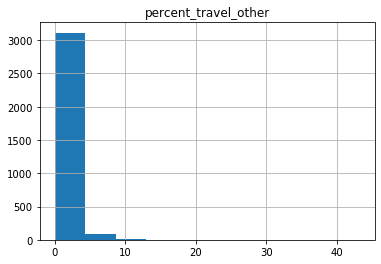

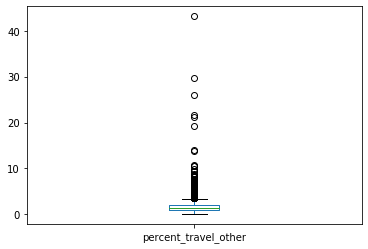

Data is of type: continuous


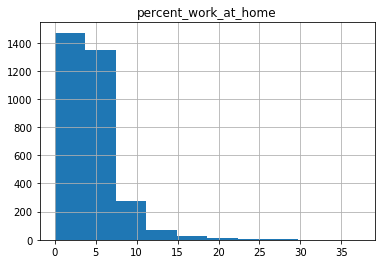

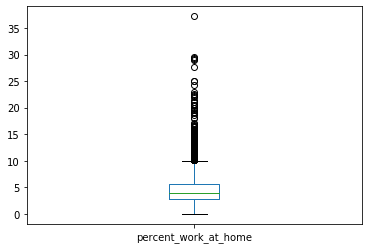

Data is of type: continuous


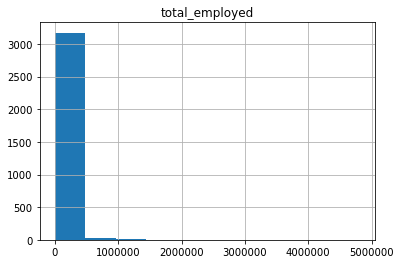

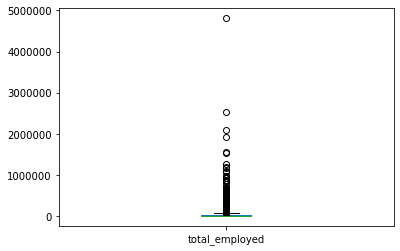

Data is of type: multiclass


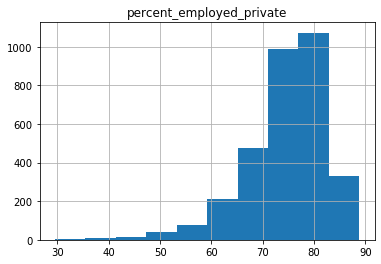

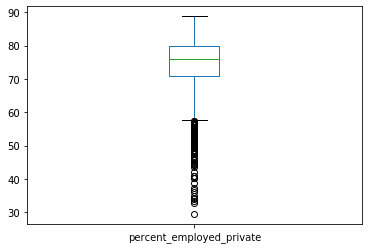

Data is of type: continuous


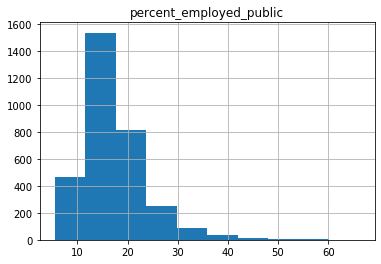

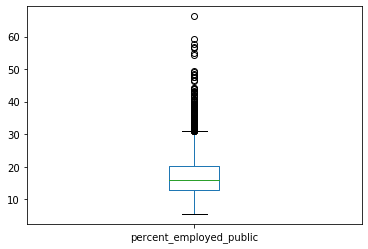

Data is of type: continuous


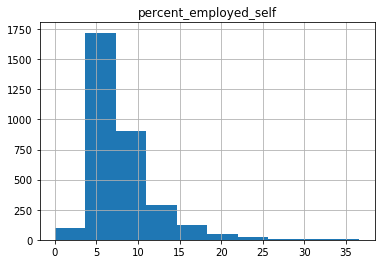

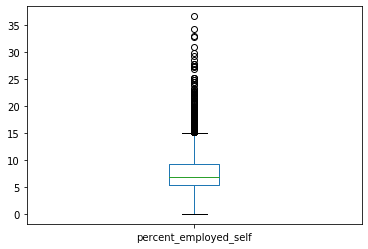

Data is of type: continuous


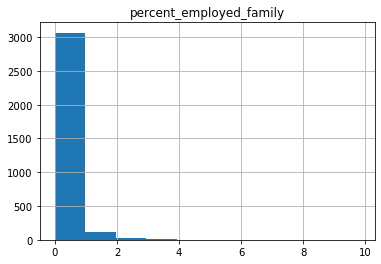

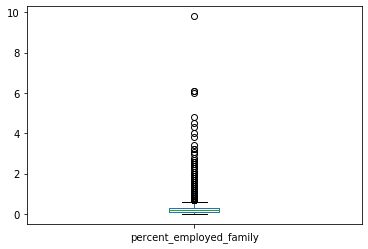

Data is of type: continuous


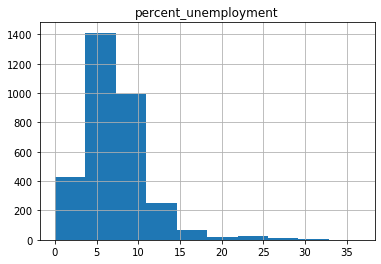

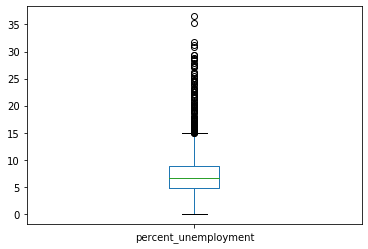

Data is of type: continuous


In [88]:
# Some further graphing to better understand the data

plt.figure(dpi=70, figsize=(10, 10))
for i in train: 
    train[i].hist()
    plt.title(i)
    plt.show() # Appears that the majority of our data is right skewed
    train[i].plot(kind='box')
    plt.show()
    print("Data is of type: "+str(utils.multiclass.type_of_target(train[i])))


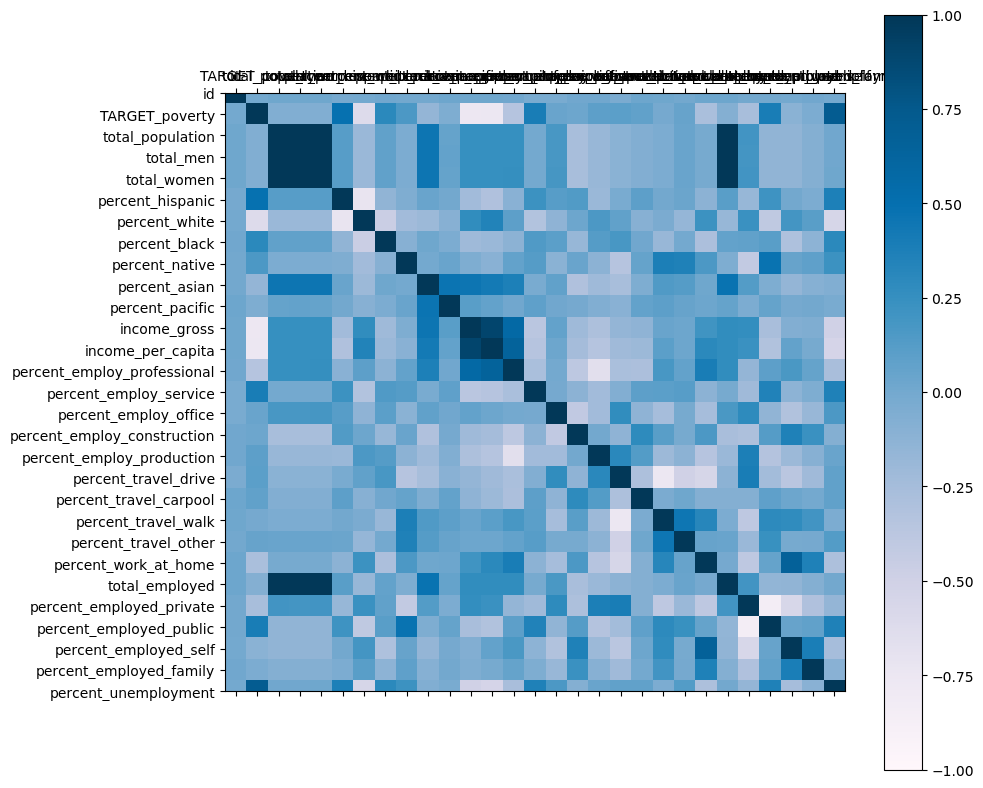

In [41]:
# Then we can attempt to view correlations in the dataset
correlations = train.corr()
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,train.shape[1],1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.show() # There doesn't appear to many obvious factors...

In [123]:
# Prepare our data for regression
depY = train['TARGET_poverty']
indieX = train
indieX = indieX.drop(columns=('TARGET_poverty'))
indieX = indieX.drop(columns=('id'))
print(indieX.shape)
indieX.head()

(3218, 27)


,total_population,total_men,total_women,percent_hispanic,percent_white,percent_black,percent_native,percent_asian,percent_pacific,income_gross,...,percent_travel_carpool,percent_travel_walk,percent_travel_other,percent_work_at_home,total_employed,percent_employed_private,percent_employed_public,percent_employed_self,percent_employed_family,percent_unemployment
0,9321,4677,4644,1.5,96.7,0.7,0.0,0.2,0.0,51422,...,8.5,5.3,1.7,8.1,4695,77.1,12.0,10.7,0.2,2.9
1,163368,80330,83038,42.7,52.4,1.6,0.5,0.7,0.1,42386,...,11.2,2.1,1.2,2.9,66165,76.6,17.9,5.3,0.2,9.3
2,10723,5398,5325,19.0,77.9,0.1,0.8,0.5,0.0,55504,...,14.2,3.1,1.0,5.5,4670,70.4,17.5,11.8,0.3,6.4
3,25789,12902,12887,6.2,85.4,3.3,0.4,3.6,0.0,54181,...,9.9,4.2,1.7,5.7,13863,80.1,12.3,7.2,0.3,3.6
4,385115,189365,195750,3.2,87.7,4.2,0.1,2.3,0.0,78380,...,6.4,0.9,0.8,5.6,206974,87.2,8.8,3.9,0.1,3.6


In [170]:
# Start running some training and testing

# Make a nice function to quickly split and test data for evaluation
def split_train_test(ratio):
     # Split our data randomly into testing and training sets
    trainX, testX, trainY, testY = train_test_split(indieX, depY, test_size=ratio)


    # Set up and train our regressors
    linReg = linear_model.LinearRegression()
    polReg = linear_model.LinearRegression()
    ridReg = linear_model.Ridge()
    linReg.fit(trainX, trainY)
    ridReg.fit(trainX, trainY)
    polyFeat = preprocessing.PolynomialFeatures(degree=1, include_bias=True)
    polyTrainX = polyFeat.fit_transform(trainX)
    polyTestX = polyFeat.fit_transform(testX)
    polReg.fit(polyTrainX, trainY)


    # Make some predictions
    predPovo = linReg.predict(testX)
    predPovoR = ridReg.predict(testX)
    predPovoP = polReg.predict(polyTestX)


    # Test the error rate of these predictions
    print('Data for split with ratio: '+str(ratio))
    print('\tMean squared error linear', mean_squared_error(testY, predPovo))
    print('\tMean squared error ridge', mean_squared_error(testY, predPovoR))
    print('\tMean squared error poly', mean_squared_error(testY, predPovoP))


# Some arbitrarily selected split values to test variances
splits = [0.1, 0.2, 0.3, 0.4, 0.5]
for split in splits:
    split_train_test(split)
   

Data for split with ratio: 0.1
	Mean squared error linear 11.85320456455239
	Mean squared error ridge 11.844984408608875
	Mean squared error poly 11.853204564694567
Data for split with ratio: 0.2
	Mean squared error linear 12.658718498428852
	Mean squared error ridge 12.6586760725874
	Mean squared error poly 12.65871849827687
Data for split with ratio: 0.3
	Mean squared error linear 12.146857688666486
	Mean squared error ridge 12.09701439392966
	Mean squared error poly 12.096729699538475
Data for split with ratio: 0.4
	Mean squared error linear 11.190173765343674
	Mean squared error ridge 11.19763592664602
	Mean squared error poly 11.190173765428346
Data for split with ratio: 0.5
	Mean squared error linear 12.150355727833478
	Mean squared error ridge 12.149314205959806
	Mean squared error poly 12.15035572792399


In [75]:
#print(linReg.intercept_)
#print(linReg.coef_)

In [167]:
# Setup the best model from out testing
split_train_test(0.2)

# Apply to real data!
predPovoR = ridReg.predict(test)
out = pd.DataFrame(predPovoR)
out.columns = ['TARGET_poverty']
out.sample(10)


Data for split with ratio: 0.2
	Mean squared error linear 11.269525819014182
	Mean squared error ridge 11.273038369086466
	Mean squared error poly 11.96145480647899


,TARGET_poverty
821,8.934175
695,23.854374
165,21.297240
481,12.603999
665,22.114500
398,13.030774
492,17.473916
953,18.249663
714,11.199587
777,17.982155


In [166]:
# Write our predicted data to a CSV file for submission :) 
data_out = out.to_csv()
with open("solution.csv","w") as f:
    f.write(data_out)


In [ ]:
### Items below I couldn't work out in time...

In [117]:
"""lMaxIter = [2,5,10,50,100,250,1000]
lF1Score = []
lAccuracyScore = []

for maxIter in lMaxIter:
    currLogRegNba = linear_model.LogisticRegression(C=1, max_iter=maxIter)
    currLogRegNba.fit(trainX, trainY)
    currPred = currLogRegNba.predict(nbaValFeat)
    lF1Score.append(f1_score(nbaValLabels, currPred))
    lAccuracyScore.append(accuracy_score(nbaValLabels, currPred))"""

'lMaxIter = [2,5,10,50,100,250,1000]\nlF1Score = []\nlAccuracyScore = []\n\nfor maxIter in lMaxIter:\n    currLogRegNba = linear_model.LogisticRegression(C=1, max_iter=maxIter)\n    currLogRegNba.fit(trainX, trainY)\n    currPred = currLogRegNba.predict(nbaValFeat)\n    lF1Score.append(f1_score(nbaValLabels, currPred))\n    lAccuracyScore.append(accuracy_score(nbaValLabels, currPred))'

In [ ]:
"""ax = plt.figure().add_subplot(1, 1, 1)
for i in train:
    ax.scatter(train['TARGET_poverty'], train[i], label=i)
    
plt.show()"""